<a href="https://colab.research.google.com/github/Anna-bashkatova/ProgramAnalitik/blob/main/%D0%9B%D0%B0%D0%B1_5_%D0%91%D0%B0%D1%88%D0%BA%D0%B0%D1%82%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение необходимых для работы библиотек:

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка файла для работы:

In [ ]:
from google.colab import files
unploaded = files.upload()

Saving HALeWHOregionLifeExpectancyAtBirth.csv to HALeWHOregionLifeExpectancyAtBirth.csv


In [ ]:
data_csv = pd.read_csv("HALeWHOregionLifeExpectancyAtBirth.csv")
data_csv.head()

,Location,Period,Indicator,Dim1,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,56.04,64.49,86.897193,87
1,Africa,2019,Healthy life expectancy (HALE) at birth (years),Male,55.00,62.37,88.183422,88
2,Africa,2019,Healthy life expectancy (HALE) at birth (years),Female,57.09,66.65,85.656414,86
3,Africa,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,54.42,62.56,86.988491,87
4,Africa,2015,Healthy life expectancy (HALE) at birth (years),Male,53.38,60.47,88.275178,88


Проверка типа данных:

In [ ]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      72 non-null     object 
 1   Period                        72 non-null     int64  
 2   Indicator                     72 non-null     object 
 3   Dim1                          72 non-null     object 
 4   Hale Expectency               72 non-null     float64
 5   Life expectany                72 non-null     float64
 6   Unnamed: 6                    72 non-null     float64
 7   % OF HALE in life expectancy  72 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ KB


Удаление ненужных столбцов:

In [ ]:
data_csv.drop(['Indicator'], axis = 1, inplace=True)
data_csv.drop(['Unnamed: 6'], axis = 1, inplace=True)

In [ ]:
data_csv.head()

,Location,Period,Dim1,Hale Expectency,Life expectany,% OF HALE in life expectancy
0,Africa,2019,Both sexes,56.04,64.49,87
1,Africa,2019,Male,55.00,62.37,88
2,Africa,2019,Female,57.09,66.65,86
3,Africa,2015,Both sexes,54.42,62.56,87
4,Africa,2015,Male,53.38,60.47,88


In [ ]:
data_csv.describe()

,Period,Hale Expectency,Life expectany,% OF HALE in life expectancy
count,72.000000,72.000000,72.000000,72.000000
mean,2011.000000,61.403333,70.556806,87.013889
std,7.156205,5.982161,6.880156,1.409156
min,2000.000000,45.030000,51.060000,85.000000
25%,2007.500000,57.870000,66.585000,86.000000
50%,2012.500000,61.665000,71.375000,87.000000
75%,2016.000000,66.360000,75.525000,88.000000
max,2019.000000,70.240000,81.290000,90.000000


Переименовываем столбцы для удобства работы:

In [ ]:
data_csv.rename(columns={'Dim1':'Пол'}, inplace=True)
data_csv.rename(columns={'Location':'Регион'}, inplace=True)
data_csv.rename(columns={'Period':'Период'}, inplace=True)
data_csv.rename(columns={'Hale Expectency':'Ср. прод-ть жизни'}, inplace=True)
data_csv.rename(columns={'Life expectany':'Ср. прод-ть жизни при ЗОЖ'}, inplace=True)
data_csv.rename(columns={'% OF HALE in life expectancy':'% ср. прод-ти жизни при ЗОЖ'}, inplace=True)

In [ ]:
data_csv.head()

,Регион,Период,Пол,Ср. прод-ть жизни,Ср. прод-ть жизни при ЗОЖ,% ср. прод-ти жизни при ЗОЖ
0,Africa,2019,Both sexes,56.04,64.49,87
1,Africa,2019,Male,55.00,62.37,88
2,Africa,2019,Female,57.09,66.65,86
3,Africa,2015,Both sexes,54.42,62.56,87
4,Africa,2015,Male,53.38,60.47,88


#1 Box plots

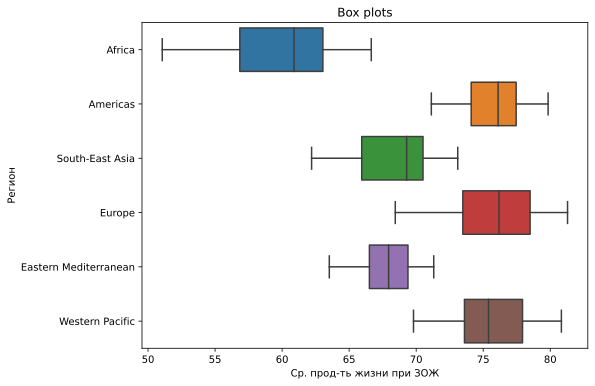

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(x="Ср. прод-ть жизни при ЗОЖ", y="Регион", data=data_csv)
ax.set_title("Box plots");

**Диаграмма boxplot - "ящик с усами"** - показывает нам какая средняя прододжительность жизни в разных регионах. 

По графику мы видим, что сама низкая - в Africa, а в Europe самая большая продолжительность жизни.

#2 Violin plot

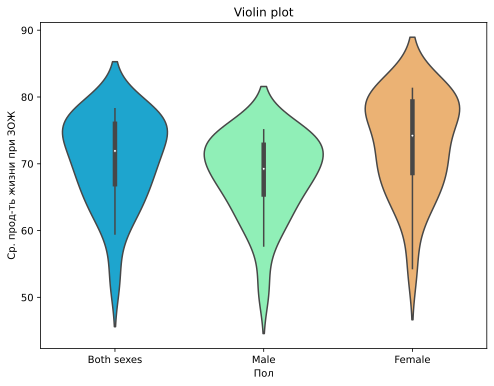

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.violinplot(x="Пол", y="Ср. прод-ть жизни при ЗОЖ", data=data_csv, palette='rainbow');
ax.set_title("Violin plot");

На данной диаграмме мы видим, что средняя продолжительность жизни при ЗОЖ выше у женщин.

#3 Count plots

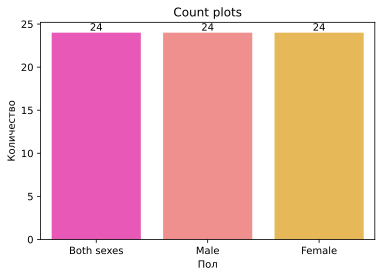

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='Пол', data=data_csv, ax=ax, palette="spring")
ax.set_title("Count plots")
plt.xlabel('Пол')
plt.ylabel('Количество')
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

С помощью Count plots мы видим, что в анализе используется одинаковое количество людей разного пола.

#4 Heatmap

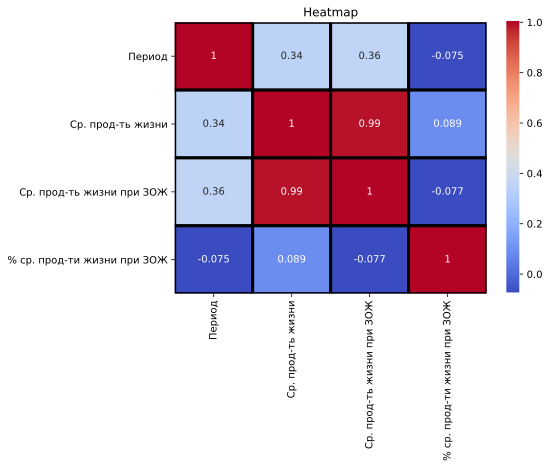

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_csv.corr(), cmap ='coolwarm', annot=True, linewidths=3, linecolor='black')
plt.title("Heatmap");

#5 Facet grid

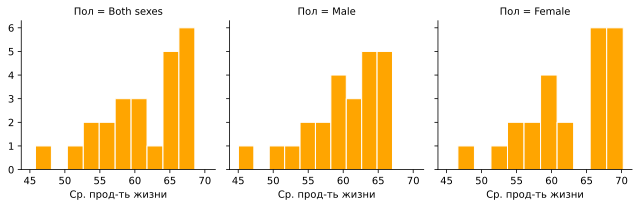

In [ ]:
a=sns.FacetGrid(data=data_csv, col='Пол')
a.map(plt.hist, "Ср. прод-ть жизни",color = 'orange', edgecolor ="w");

С помощью Facet grid мы видим, что средняя продолжительность женщин выше, чем у мужчин. У женщин она достигает 65-70 лет, а у мужчин в основном до 65.

#6 Regplot

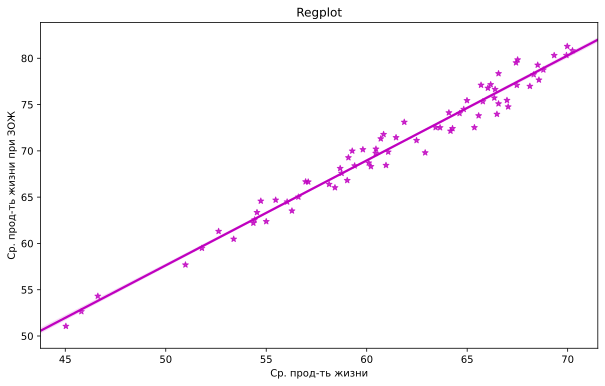

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')
sns.regplot(x="Ср. прод-ть жизни", y="Ср. прод-ть жизни при ЗОЖ", color="m", data = data_csv, marker="*", ci=68, truncate=False);
plt.title("Regplot");

#7 lmplot

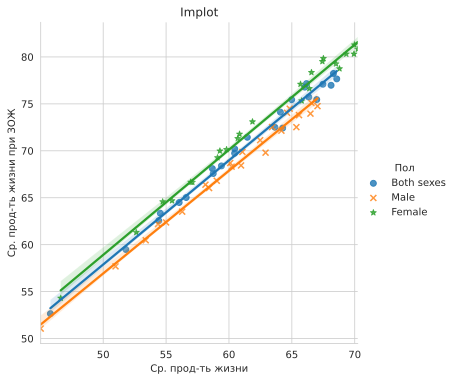

In [ ]:
sns.lmplot(x="Ср. прод-ть жизни", y="Ср. прод-ть жизни при ЗОЖ", hue="Пол",  data=data_csv,markers=['o', 'x','*'])
plt.title("Implot");

#8 Swarm plot

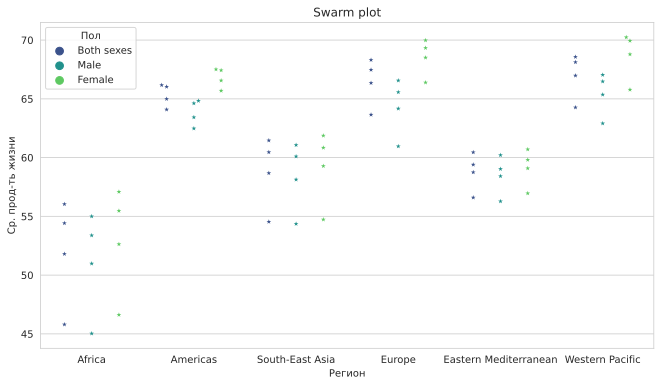

In [ ]:
plt.figure(figsize=(11,6))
sns.swarmplot(x='Регион', y='Ср. прод-ть жизни', data=data_csv, hue='Пол', marker='*', dodge=True, palette='viridis')
plt.title("Swarm plot");

По данному графику можно заметить, что высокая продолжительность жизни в Europe и Western Pacific, а в Africa - самые низкие показатели.

#9 Pair plot

<Figure size 1080x576 with 0 Axes>

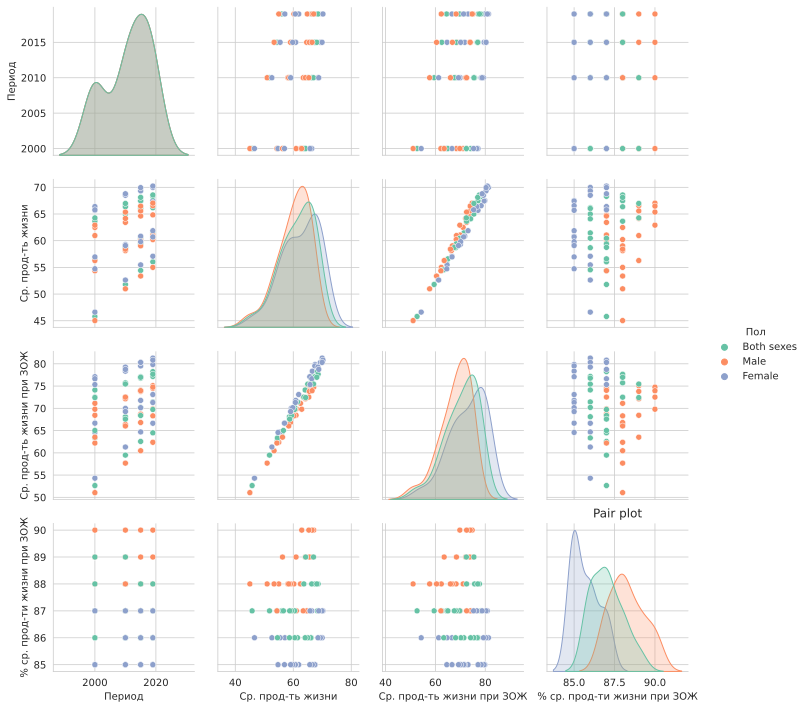

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(data = data_csv, hue = 'Пол', palette = 'Set2');
plt.title("Pair plot");

#10 Joint plot

Для удобства просмотрим данные только по женщинам.

In [ ]:
d2=data_csv[(data_csv['Пол']=='Female')]
d2.head()

,Регион,Период,Пол,Ср. прод-ть жизни,Ср. прод-ть жизни при ЗОЖ,% ср. прод-ти жизни при ЗОЖ
2,Africa,2019,Female,57.09,66.65,86
5,Africa,2015,Female,55.47,64.69,86
8,Africa,2010,Female,52.63,61.31,86
11,Africa,2000,Female,46.62,54.31,86
14,Americas,2019,Female,67.51,79.84,85


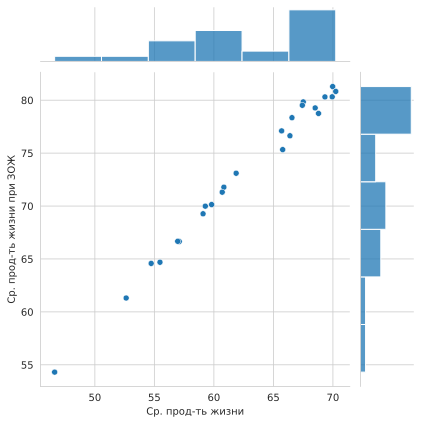

In [ ]:
sns.jointplot(y = 'Ср. прод-ть жизни при ЗОЖ', x = 'Ср. прод-ть жизни', data = d2, kind = "scatter");